4
7
13
16
19
21
24
28
29
31
32
37
43
46
54
63
66
71
74
71
66
62
57
56
53
49
47


FloatSlider(value=1.0, description='Value:', max=10.0, step=0.01)

IntSlider(value=100, description='Value:', max=224)

100


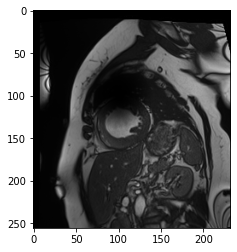

In [27]:
import numpy as np
from PIL import Image, ImageDraw
import h5py
import matplotlib.pyplot as plt
import ipywidgets as widgets
from networks.unet import UNet
from networks.vision_transformer import SwinUnet as ViT_seg

# 建立一個 FloatSlider 物件
slider = widgets.FloatSlider(
    value=1,   # 初始數值
    min=0,       # 最小值
    max=10,       # 最大值
    step=0.01,   # 每次增減的值
    description='Value:',  # Bar 旁邊顯示的文字
    orientation='horizontal',  # Bar 的方向，水平或垂直
    readout=True,  # 是否顯示目前數值
    readout_format='.2f',  # 目前數值顯示的格式
)
# 顯示 Bar
x = widgets.IntSlider(
    value=100,   # 初始數值
    min=0,       # 最小值
    max=224,       # 最大值
    step=1,   # 每次增減的值
    description='Value:',  # Bar 旁邊顯示的文字
    orientation='horizontal',  # Bar 的方向，水平或垂直
    readout=True,  # 是否顯示目前數值
    # readout_format='.2f',  # 目前數值顯示的格式
)

y = widgets.IntSlider(
    value=100,   # 初始數值
    min=0,       # 最小值
    max=224,       # 最大值
    step=1,   # 每次增減的值
    description='Value:',  # Bar 旁邊顯示的文字
    orientation='horizontal',  # Bar 的方向，水平或垂直
    readout=True,  # 是否顯示目前數值
    # readout_format='.2f',  # 目前數值顯示的格式
)

r = widgets.IntSlider(
    value=10,   # 初始數值
    min=0,       # 最小值
    max=100,       # 最大值
    step=1,   # 每次增減的值
    description='Value:',  # Bar 旁邊顯示的文字
    orientation='horizontal',  # Bar 的方向，水平或垂直
    readout=True,  # 是否顯示目前數值
    # readout_format='.2f',  # 目前數值顯示的格式
)

display(slider)
display(x)
display(y)
display(r)

def create_circular_mask(org_img,x=100,y=100,radius=100,magnite = 5 ):
    mask = org_img.copy()
    mask = np.ones(mask.shape).astype('float32')
    for i in range(mask.shape[0]):
        for j in range(mask.shape[1]):
            if (i-x)**2 + (j-y)**2 <= radius**2:
                mask[i,j] = (((i-x)**2 + (j-y)**2) / radius**2 )** magnite
    return np.multiply(mask,org_img)


# 讀取圖片，並將其轉換為numpy陣列
h5f = h5py.File('./data' + "/data/slices/patient002_frame02_slice_5.h5", "r")

img = h5f["image"][:]
img_arr = np.array(img)

# 建立mask
mask = create_circular_mask(img_arr, x.value, y.value, 40, slider.value)
print(slider1.value)
# 將mask的值乘上0.5，讓靠近圓心的像素較暗

plt.imshow(mask,cmap='gray')
plt.show()

pil_img = Image.fromarray(np.uint8(mask * 255), mode='L')
org_img = Image.fromarray(np.uint8(img_arr * 255), mode='L')
# 儲存成 png 檔案

pil_img.save('mask.png')

In [5]:
import numpy as np
from PIL import Image, ImageDraw
import h5py
import matplotlib.pyplot as plt
import ipywidgets as widgets
from networks.unet import UNet
from networks.vision_transformer import SwinUnet as ViT_seg
import torch
import cv2

def create_circular_mask(org_img,x=100,y=100,radius=100,magnite = 5 ):
    mask = org_img.copy()
    mask = np.ones(mask.shape).astype('float32')
    for i in range(mask.shape[0]):
        for j in range(mask.shape[1]):
            if (i-x)**2 + (j-y)**2 <= radius**2:
                mask[i,j] = (((i-x)**2 + (j-y)**2) / radius**2 )** magnite
    return np.multiply(mask,org_img)

def update_mask(*args):
    # 建立mask
    mask = create_circular_mask(img_arr, x.value, y.value, r.value, slider.value)

    # 將mask的值乘上0.5，讓靠近圓心的像素較暗
    plt.imshow(mask, cmap='gray')
    plt.show()

    pil_img = Image.fromarray(np.uint8(mask * 255), mode='L')
    org_img = Image.fromarray(np.uint8(img_arr * 255), mode='L')
    # 儲存成 png 檔案
    pil_img.save('mask.png')

# 讀取圖片，並將其轉換為numpy陣列
h5f = h5py.File('./data' + "/data/slices/patient002_frame02_slice_5.h5", "r")
img = h5f["image"][:]
img_arr = np.array(img)
img_arr = cv2.resize(img_arr, (224, 224))


label = h5f["label"][:]
label_arr = np.array(label)
label_arr = cv2.resize(label_arr, (224, 224))

model1 = UNet(in_chns=1, class_num=4).cuda()






model1.load_state_dict(torch.load("/home/student/SSL4MIS/model/ACDC/Cross_Teaching_Between_CNN_Transformer_7/unet/model1_iter_30000_dice_0.8636.pth"))
# model2.load_state_dict(torch.load("/home/student/SSL4MIS/model/ACDC/Cross_Teaching_Between_CNN_Transformer_7/unet/model2_iter_29400_dice_0.853.pth"))
model1.eval()

# model2.eval()

# 建立一個 FloatSlider 物件
slider = widgets.FloatSlider(
    value=1,   # 初始數值
    min=0,       # 最小值
    max=10,       # 最大值
    step=0.01,   # 每次增減的值
    description='Value:',  # Bar 旁邊顯示的文字
    orientation='horizontal',  # Bar 的方向，水平或垂直
    readout=True,  # 是否顯示目前數值
    readout_format='.2f',  # 目前數值顯示的格式
)

# 顯示 Bar
x = widgets.IntSlider(
    value=100,   # 初始數值
    min=0,       # 最小值
    max=224,       # 最大值
    step=1,   # 每次增減的值
    description='y:',  # Bar 旁邊顯示的文字
    orientation='vertical',  # Bar 的方向，水平或垂直
    readout=True,  # 是否顯示目前數值
    # readout_format
)

y = widgets.IntSlider(
    value=100,   # 初始數值
    min=0,       # 最小值
    max=224,       # 最大值
    step=1,   # 每次增減的值
    description='x:',  # Bar 旁邊顯示的文字
    orientation='horizontal',  # Bar 的方向，水平或垂直
    readout=True,  # 是否顯示目前數值
    # readout_format='.2f',  # 目前數值顯示的格式
)

r = widgets.IntSlider(
    value=40,   # 初始數值
    min=1,       # 最小值
    max=100,       # 最大值
    step=1,   # 每次增減的值
    description='r:',  # Bar 旁邊顯示的文字
    orientation='horizontal',  # Bar 的方向，水平或垂直
    readout=True,  # 是否顯示目前數值
    # readout_format='.2f',  # 目前數值顯示的格式
)


def update_image(slider_value, x_value, y_value, r_value):
    # 建立mask
    mask = create_circular_mask(img_arr, x_value, y_value, r_value, slider_value)
    mask1 = torch.tensor(mask).unsqueeze(0).unsqueeze(0).cuda()
    mask1 = mask1.to(torch.float32)
    mask1 = mask1.cuda()
    outMask = model1(mask1)
    probsMask = torch.softmax(outMask, dim=1)
    _, predsMask = torch.max(probsMask, dim=1)
    pred_img_mask = predsMask.cpu().detach().numpy().transpose(1, 2, 0)

    image = torch.tensor(img_arr).unsqueeze(0).unsqueeze(0).cuda()
    image = image.to(torch.float32)
    out1 = model1(image)
    probs1 = torch.softmax(out1, dim=1)
    _, preds1 = torch.max(probs1, dim=1)
    pred_img1 = preds1.cpu().detach().numpy().transpose(1, 2, 0)


    # 顯示圖片
    fig, ax = plt.subplots(1, 5, figsize=(20, 20))
    ax[0].imshow(img_arr, cmap='gray')
    ax[0].set_title('Original Image')

    ax[1].imshow(mask, cmap='gray')
    ax[1].set_title('Masked Image')

    ax[2].imshow(label_arr, cmap='gray')
    ax[2].set_title('Label Image')
    
    ax[3].imshow(pred_img1, cmap='gray')
    ax[3].set_title('org_pred_img Image')

    ax[4].imshow(pred_img_mask, cmap='gray')
    ax[4].set_title('Pred Masked Image')
    plt.show()
    
# 使用 interact 函數建立互動介面

widgets.interact(update_image,
                 slider_value=slider,
                 x_value=x,
                 y_value=y,
                 r_value=r)

interactive(children=(FloatSlider(value=1.0, description='Value:', max=10.0, step=0.01), IntSlider(value=100, …

<function __main__.update_image(slider_value, x_value, y_value, r_value)>

torch.Size([1, 4, 224, 224])
torch.Size([1, 224, 224])
(1, 224, 224, 1)
0.8366938484304872
{'aAcc': array(0.99340322), 'IoU': array([0.99628982, 0.76329114, 0.82882166, 0.91796875]), 'Acc': array([0.99822579, 0.86142857, 0.92287234, 0.93718843])}
0.9071631155166718
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210


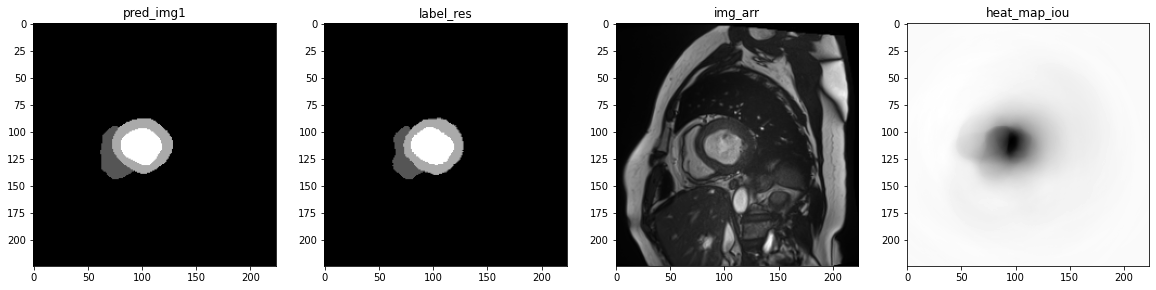

In [27]:
import numpy as np
from PIL import Image, ImageDraw
import h5py
import matplotlib.pyplot as plt
import ipywidgets as widgets
from networks.unet import UNet
from networks.vision_transformer import SwinUnet as ViT_seg
import torch
import cv2
import metric
from tqdm import tqdm


def create_circular_mask(org_img,x=100,y=100,radius=100,magnite = 5 ):
    mask = org_img.copy()
    mask = np.ones(mask.shape).astype('float32')
    for i in range(mask.shape[0]):
        for j in range(mask.shape[1]):
            if (i-x)**2 + (j-y)**2 <= radius**2:
                mask[i,j] = (((i-x)**2 + (j-y)**2) / radius**2 )** magnite
    return np.multiply(mask,org_img)

h5f = h5py.File('./data' + "/data/slices/patient002_frame02_slice_2.h5", "r")
img = h5f["image"][:]
img_arr = np.array(img)
img_arr = cv2.resize(img_arr, (224, 224))
label = h5f["label"][:]
label_arr = np.array(label)
label_arr = cv2.resize(label_arr, (224, 224))

model1 = UNet(in_chns=1, class_num=4).cuda()
model1.load_state_dict(torch.load("/home/student/SSL4MIS/model/ACDC/Cross_Teaching_Between_CNN_Transformer_7/unet/model1_iter_30000_dice_0.8636.pth"))
model1.eval()


gt = []
predres1 = []
img = img_arr.copy()
img_arr= torch.tensor(img_arr).unsqueeze(0).unsqueeze(0).cuda()
img_arr = img_arr.to(torch.float32)
img_arr = img_arr.cuda()

out = model1(img_arr)

probs1 = torch.softmax(out, dim=1)
print(probs1.shape)
_, preds1 = torch.max(probs1, dim=1)
print(preds1.shape)

pred_img1 = preds1.cpu().detach().numpy().transpose(1, 2, 0)

label_res = torch.tensor(label_arr).unsqueeze(0).cuda()

label_res = label_res.to(torch.float32)
label_res = label_res.cuda()
label_res = label_res.cpu().detach().numpy().transpose(1, 2, 0)

predres1.append(pred_img1)
print(np.array(predres1).shape)
gt.append(label_res)

iou1 = metric.mean_iou(predres1, gt, 4, None,)
print(np.mean(iou1['IoU'][1:]))
print(iou1)
print(np.mean(iou1['Acc'][1:]))



heat_map_iou = np.zeros_like(img)
heat_map_acc = np.zeros_like(img)
heat_class1_iou = np.zeros_like(img)
heat_class2_iou = np.zeros_like(img)
heat_class3_iou = np.zeros_like(img)
heat_class1_acc = np.zeros_like(img)
heat_class2_acc = np.zeros_like(img)
heat_class3_acc = np.zeros_like(img)



img_org = img.copy()



for k in range(224):
    for l in range(224):
        predres1 = []
        gt = []
        # =================================================================================
        img = create_circular_mask(img_org,k,l,100,0.7)
        img= torch.tensor(img).unsqueeze(0).unsqueeze(0).cuda()
        img = img.to(torch.float32)
        img = img.cuda()
        out = model1(img)
        probs1 = torch.softmax(out, dim=1)
        _, preds1 = torch.max(probs1, dim=1)
        pred_img1 = preds1.cpu().detach().numpy().transpose(1, 2, 0)
        predres1.append(pred_img1)
        gt.append(label_res)
        iou1 = metric.mean_iou(predres1, gt, 4, None,)
        heat_map_iou[k,l] = np.mean(iou1['IoU'][1:])
        heat_map_acc[k,l] = np.mean(iou1['Acc'][1:])
        heat_class1_iou[k,l] = iou1['IoU'][1]
        heat_class2_iou[k,l] = iou1['IoU'][2]
        heat_class3_iou[k,l] = iou1['IoU'][3]
        heat_class1_acc[k,l] = iou1['Acc'][1]
        heat_class2_acc[k,l] = iou1['Acc'][2]
        heat_class3_acc[k,l] = iou1['Acc'][3]


        # print(heat_map_iou[k,l])
        # print(k,l)
        # q += 1
    print(k)


        


fig, ax = plt.subplots(1, 4, figsize=(20, 20))

ax[0].imshow(pred_img1,cmap = 'gray')
ax[0].set_title('pred_img1')
ax[1].imshow(label_res,cmap = 'gray')
ax[1].set_title('label_res')
ax[2].imshow(img_org,cmap = 'gray')
ax[2].set_title('img_arr')
ax[3].imshow(heat_map_iou,cmap = 'gray')
ax[3].set_title('heat_map_iou')
plt.show()








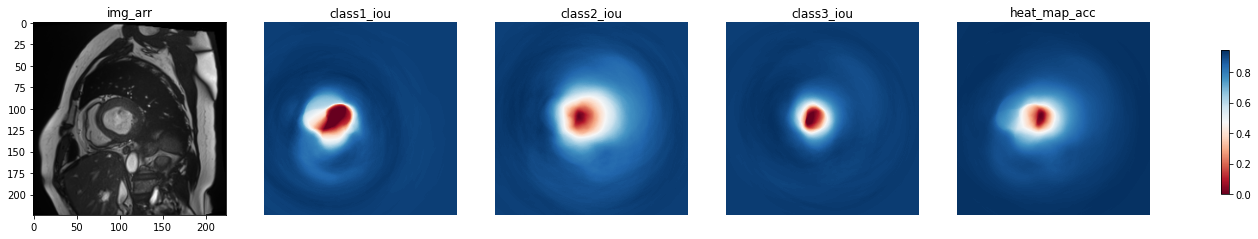

In [28]:
import matplotlib.cm as cm

fig, ax = plt.subplots(1, 5, figsize=(20, 20))

ax[0].imshow(img_org,cmap = 'gray')
ax[0].set_title('img_arr')
# ax[0].axis('off')

ax[1].imshow(heat_class1_iou,cmap = 'RdBu')
ax[1].set_title('class1_iou')
ax[1].axis('off')

ax[2].imshow(heat_class2_iou,cmap = 'RdBu')
ax[2].set_title('class2_iou')
ax[2].axis('off')

ax[3].imshow(heat_class3_iou,cmap = 'RdBu')
ax[3].set_title('class3_iou')
ax[3].axis('off')
heatmap =  ax[3].imshow(heat_class3_iou,cmap = 'RdBu')
sm = cm.ScalarMappable(cmap=cm.RdBu, norm=heatmap.norm)


sm.set_array([])


ax[4].imshow(heat_map_acc,cmap = 'RdBu')
ax[4].set_title('heat_map_acc')
ax[4].axis('off')

cbar_ax = fig.add_axes([0.95, 0.45, 0.005, 0.1])  # 調整 colorbar 的位置和大小
fig.colorbar(sm, cax=cbar_ax)

plt.savefig('result/UnetClassR100M0.7.png') # 將圖像保存到當前工作目錄下的 my_figure.png 檔案中
plt.show()

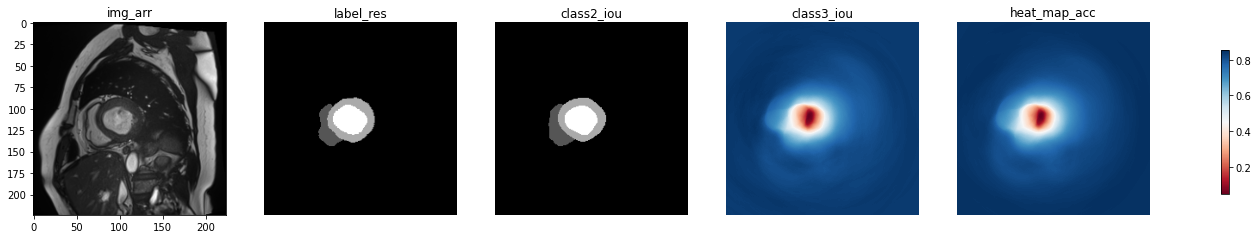

In [29]:
import matplotlib.cm as cm

fig, ax = plt.subplots(1, 5, figsize=(20, 20))

ax[0].imshow(img_org,cmap = 'gray')
ax[0].set_title('img_arr')
# ax[0].axis('off')

ax[1].imshow(label_res,cmap = 'gray')
ax[1].set_title('label_res')
ax[1].axis('off')

ax[2].imshow(pred_img1,cmap = 'gray')
ax[2].set_title('class2_iou')
ax[2].axis('off')

ax[3].imshow(heat_map_iou,cmap = 'RdBu')
ax[3].set_title('class3_iou')
ax[3].axis('off')
heatmap =  ax[3].imshow(heat_map_iou,cmap = 'RdBu')
sm = cm.ScalarMappable(cmap=cm.RdBu, norm=heatmap.norm)


sm.set_array([])


ax[4].imshow(heat_map_acc,cmap = 'RdBu')
ax[4].set_title('heat_map_acc')
ax[4].axis('off')

cbar_ax = fig.add_axes([0.95, 0.45, 0.005, 0.1])  # 調整 colorbar 的位置和大小
fig.colorbar(sm, cax=cbar_ax)

plt.savefig('result/UnetR100M0..png') # 將圖像保存到當前工作目錄下的 my_figure.png 檔案中
plt.show()

In [33]:
import numpy as np
from PIL import Image, ImageDraw
import h5py
import matplotlib.pyplot as plt
import ipywidgets as widgets
from networks.unet import UNet
from networks.vision_transformer import SwinUnet 
import torch
import cv2
import metric
from tqdm import tqdm


def create_circular_mask(org_img,x=100,y=100,radius=100,magnite = 0.5 ):
    mask = org_img.copy()
    mask = np.ones(mask.shape).astype('float32')
    for i in range(mask.shape[0]):
        for j in range(mask.shape[1]):
            if (i-x)**2 + (j-y)**2 <= radius**2:
                mask[i,j] = (((i-x)**2 + (j-y)**2) / radius**2 )** magnite
    return np.multiply(mask,org_img)

h5f = h5py.File('./data' + "/data/slices/patient002_frame02_slice_2.h5", "r")
img = h5f["image"][:]
img_arr = np.array(img)
img_arr = cv2.resize(img_arr, (224, 224))
label = h5f["label"][:]
label_arr = np.array(label)
label_arr = cv2.resize(label_arr, (224, 224))


model1 = SwinUnet(None, img_size=[224,224],
                    num_classes=4).cuda()
# model1 = UNet(in_chns=1, class_num=4).cuda()
model1.load_state_dict(torch.load("/home/student/SSL4MIS/model/ACDC/Cross_Teaching_Between_CNN_Transformer_7/unet/model2_iter_29400_dice_0.853.pth"))
model1.eval()

for red in tqdm(range(4)):
    for meg in tqdm(range(4)):

        if red == 0:
            R = 25
        elif red == 1:
            R = 50
        elif red == 2:
            R = 75
        elif red == 3:
            R = 100
        if meg == 0:
            M = 0.3
        elif meg == 1:
            M = 0.5
        elif meg == 2:
            M = 0.7
        elif meg == 3:
            M = 1.0

        gt = []
        predres1 = []
        img = img_arr.copy()
        img_arr= torch.tensor(img_arr).unsqueeze(0).unsqueeze(0).cuda()
        img_arr = img_arr.to(torch.float32)
        img_arr = img_arr.cuda()

        out = model1(img_arr)

        probs1 = torch.softmax(out, dim=1)
        print(probs1.shape)
        _, preds1 = torch.max(probs1, dim=1)
        print(preds1.shape)

        pred_img1 = preds1.cpu().detach().numpy().transpose(1, 2, 0)

        label_res = torch.tensor(label_arr).unsqueeze(0).cuda()

        label_res = label_res.to(torch.float32)
        label_res = label_res.cuda()
        label_res = label_res.cpu().detach().numpy().transpose(1, 2, 0)

        predres1.append(pred_img1)
        print(np.array(predres1).shape)
        gt.append(label_res)

        iou1 = metric.mean_iou(predres1, gt, 4, None,)
        print(np.mean(iou1['IoU'][1:]))
        print(iou1)
        print(np.mean(iou1['Acc'][1:]))



        heat_map_iou = np.zeros_like(img)
        heat_map_acc = np.zeros_like(img)
        heat_class1_iou = np.zeros_like(img)
        heat_class2_iou = np.zeros_like(img)
        heat_class3_iou = np.zeros_like(img)
        heat_class1_acc = np.zeros_like(img)
        heat_class2_acc = np.zeros_like(img)
        heat_class3_acc = np.zeros_like(img)



        img_org = img.copy()



        for k in tqdm(range(224)):
            for l in range(224):
                predres1 = []
                gt = []
                img = create_circular_mask(img_org,k,l,R,M)
                img= torch.tensor(img).unsqueeze(0).unsqueeze(0).cuda()
                img = img.to(torch.float32)
                img = img.cuda()
                out = model1(img)
                probs1 = torch.softmax(out, dim=1)
                _, preds1 = torch.max(probs1, dim=1)
                pred_img1 = preds1.cpu().detach().numpy().transpose(1, 2, 0)
                predres1.append(pred_img1)
                gt.append(label_res)
                iou1 = metric.mean_iou(predres1, gt, 4, None,)
                heat_map_iou[k,l] = np.mean(iou1['IoU'][1:])
                heat_map_acc[k,l] = np.mean(iou1['Acc'][1:])
                heat_class1_iou[k,l] = iou1['IoU'][1]
                heat_class2_iou[k,l] = iou1['IoU'][2]
                heat_class3_iou[k,l] = iou1['IoU'][3]
                heat_class1_acc[k,l] = iou1['Acc'][1]
                heat_class2_acc[k,l] = iou1['Acc'][2]
                heat_class3_acc[k,l] = iou1['Acc'][3]


                # print(heat_map_iou[k,l])
                # print(k,l)
                # q += 1
            print(k)
        import matplotlib.cm as cm

        fig, ax = plt.subplots(1, 5, figsize=(20, 20))

        ax[0].imshow(img_org,cmap = 'gray')
        ax[0].set_title('img_arr')
        # ax[0].axis('off')

        ax[1].imshow(label_res,cmap = 'gray')
        ax[1].set_title('label_res')
        ax[1].axis('off')

        ax[2].imshow(pred_img1,cmap = 'gray')
        ax[2].set_title('class2_iou')
        ax[2].axis('off')

        ax[3].imshow(heat_map_iou,cmap = 'RdBu')
        ax[3].set_title('class3_iou')
        ax[3].axis('off')
        heatmap =  ax[3].imshow(heat_map_iou,cmap = 'RdBu')
        sm = cm.ScalarMappable(cmap=cm.RdBu, norm=heatmap.norm)

        np.save(f'res/Swin_heat_map_iou_R{R}_M{M}', heat_map_iou)

        sm.set_array([])


        ax[4].imshow(heat_map_acc,cmap = 'RdBu')
        ax[4].set_title('heat_map_acc')
        ax[4].axis('off')

        cbar_ax = fig.add_axes([0.95, 0.45, 0.005, 0.1])  # 調整 colorbar 的位置和大小
        fig.colorbar(sm, cax=cbar_ax)

        plt.savefig(f'result/SwinR{R}M{M}.png') 
        plt.show()
        fig, ax = plt.subplots(1, 5, figsize=(20, 20))

        ax[0].imshow(img_org,cmap = 'gray')
        ax[0].set_title('img_arr')
        # ax[0].axis('off')

        ax[1].imshow(heat_class1_iou,cmap = 'RdBu')
        ax[1].set_title('class1_iou')
        ax[1].axis('off')

        ax[2].imshow(heat_class2_iou,cmap = 'RdBu')
        ax[2].set_title('class2_iou')
        ax[2].axis('off')

        ax[3].imshow(heat_class3_iou,cmap = 'RdBu')
        ax[3].set_title('class3_iou')
        ax[3].axis('off')
        heatmap =  ax[3].imshow(heat_class3_iou,cmap = 'RdBu')
        sm = cm.ScalarMappable(cmap=cm.RdBu, norm=heatmap.norm)


        sm.set_array([])


        ax[4].imshow(heat_map_acc,cmap = 'RdBu')
        ax[4].set_title('heat_map_acc')
        ax[4].axis('off')

        np.save(f'res/Swin_heat_class1_iou{R}_M{M}', heat_class1_iou)
        np.save(f'res/Swin_heat_class2_iou{R}_M{M}', heat_class2_iou)
        np.save(f'res/Swin_heat_class3_iou{R}_M{M}', heat_class3_iou)
        np.save(f'res/Swin_heat_class1_acc{R}_M{M}', heat_class1_acc)
        np.save(f'res/Swin_heat_class2_acc{R}_M{M}', heat_class2_acc)
        np.save(f'res/Swin_heat_class3_acc{R}_M{M}', heat_class3_acc)
        np.save(f'res/Swin_heat_map_acc{R}_M{M}', heat_map_acc)

        cbar_ax = fig.add_axes([0.95, 0.45, 0.005, 0.1])  # 調整 colorbar 的位置和大小
        fig.colorbar(sm, cax=cbar_ax)

        plt.savefig(f'result/SwinClassR{R}M{M}.png') # 將圖像保存到當前工作目錄下的 my_figure.png 檔案中
        plt.show()



        







SwinTransformerSys expand initial----depths:[2, 2, 2, 2];depths_decoder:[1, 2, 2, 2];drop_path_rate:0.2;num_classes:4
---final upsample expand_first---


  0%|          | 0/4 [00:00<?, ?it/s]

torch.Size([1, 4, 224, 224])
torch.Size([1, 224, 224])
(1, 224, 224, 1)
0.8264915012772135
{'aAcc': array(0.99230708), 'IoU': array([0.99481669, 0.74938875, 0.81481481, 0.91527094]), 'Acc': array([0.99723308, 0.87571429, 0.91666667, 0.92622134])}
0.9062007627909922


0


1


2


3


4


5


6


7


8


  0%|          | 0/4 [01:28<?, ?it/s]


KeyboardInterrupt: 

In [23]:
print(np.mean(heat_class1_acc))
print(np.mean(heat_class2_acc))
print(np.mean(heat_class3_acc))
print(np.mean(heat_class1_iou))
print(np.mean(heat_class2_iou))
print(np.mean(heat_class3_iou))
print(np.mean(heat_map_acc))
print(np.mean(heat_map_iou))

0.8552904632835279
0.9065722875336968
0.9325005889538018
0.763929320998581
0.8171869793313467
0.9156992372514201
0.8981211132570087
0.8322718458604493
